In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
df = pd.read_csv("exam_scores.csv")
print("Dataset:\n", df)

Dataset:
    Hours  Score
0      1     30
1      2     35
2      3     50
3      4     55
4      5     65
5      6     70
6      7     75
7      8     85
8      9     90
9     10     95


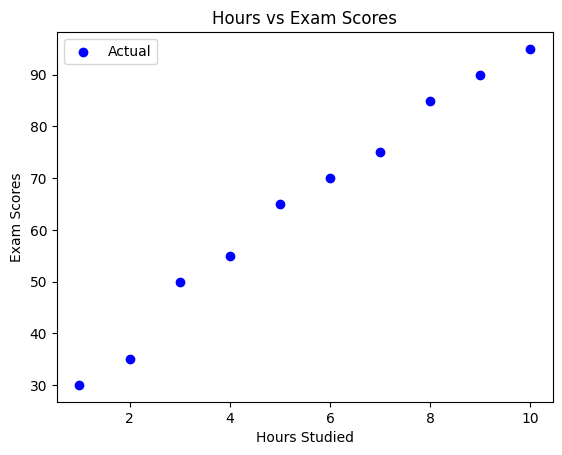

In [12]:
plt.scatter(df['Hours'], df['Score'], color = "blue", label = "Actual")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.title("Hours vs Exam Scores")
plt.legend()
plt.show()

In [15]:
X = df['Hours'].values
Y = df['Score'].values

x_mean, y_mean = X.mean(), Y.mean()
b1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
b0 = y_mean - b1 * x_mean

print(f"Linear Regression : Intercept = {b0:.04f}, Slope = {b1:.04f}")

Linear Regression : Intercept = 24.6667, Slope = 7.3333


In [21]:
x_reshaped = df[['Hours']]

model = LinearRegression()
model.fit(x_reshaped, Y)

print("Intercept after reshape", model.intercept_)
print("Slope after reshape", model.coef_[0])

Intercept after reshape 24.666666666666657
Slope after reshape 7.333333333333336


In [26]:
y_pred = model.predict(x_reshaped)

residuals = Y - y_pred
r2 = r2_score(Y, y_pred)
rmse = np.sqrt(mean_squared_error(Y, y_pred))

print("R2 : ", r2)
print("RMSE : ", rmse)

R2 :  0.9859259259259259
RMSE :  2.516611478423583


In [27]:
df['Predicted'] = y_pred
df['Residuals'] = residuals

df.to_csv("exam_scores_with_predictions.csv", index=False)
print("\n Predictions are saved to exam_scores_with_predictions.csv")


 Predictions are saved to exam_scores_with_predictions.csv


In [29]:
sample_hours = np.array([[7.5]])
predicted_score = model.predict(sample_hours)

print("Predicted Exam Score for sample_hours : ", predicted_score)

Predicted Exam Score for sample_hours :  [79.66666667]


C:\Users\MADAN RAJ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


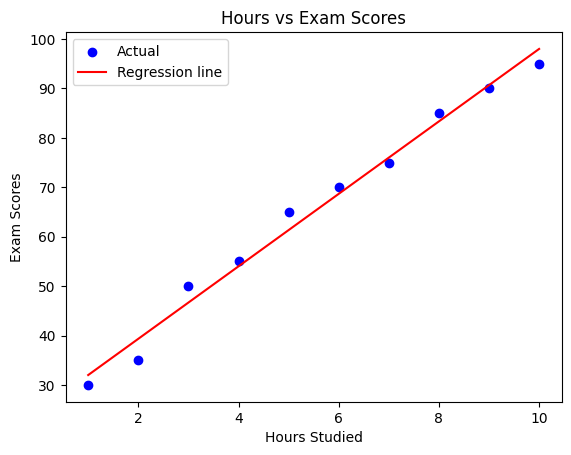

In [31]:
plt.scatter(df['Hours'], df['Score'], color = "blue", label = "Actual")
plt.plot(df['Hours'], y_pred, color = "red", label = "Regression line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.title("Hours vs Exam Scores")
plt.legend()
plt.show()